# Airbnb Data analysis
Suppose you are working in the data driven domain at Aibnb. You have a dataset and need to derive insights from it  to answe key business questions,as a company officials aim to grow the business
<ol>
    <li>What is the distribution of listing prices?</li>
    <li>How are different room types distributed ?</li>
    <li>How are listings distributed across different neighborhoods?</li>
    <li>What are the relationship between price and room type?</li>
    <li>How has the number of review changed over time ?</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('compressed_data.csv',lineterminator='\n')

In [4]:
df.shape

(102599, 26)

In [5]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license\r
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,\r
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,\r
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",\r
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,\r
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",\r


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [11]:
# checking duplicated vlues
df.duplicated().sum()

541

In [13]:
# checking null values
df.isnull().sum()

id                                    0
NAME                                250
host id                               0
host_identity_verified              289
host name                           406
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country code                        131
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
house_rules                       52131


In [15]:
df.isnull().sum().sum()

88172

# Handaling missing values

In [18]:
# converting last review column data type to date time format
df['last review']= pd.to_datetime(df['last review'],errors='coerce')
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license\r'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [ ]:
# fill values in last

In [33]:
df.fillna({
    'reviews per month': 0,
    'last review': df['last review'].min()
}, inplace=True)


In [35]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license\r
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,\r
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,\r
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",\r
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,\r
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",\r


In [39]:
df.dropna(subset=['NAME','host name'],inplace=True)

In [45]:
df.isnull().sum()

id                                    0
NAME                                  0
host id                               0
host_identity_verified              276
host name                             0
neighbourhood group                  26
neighbourhood                        16
lat                                   8
long                                  8
country                             526
country code                        122
instant_bookable                     96
cancellation_policy                  70
room type                             0
Construction year                   200
price                               239
service fee                         268
minimum nights                      403
number of reviews                   182
last review                           0
reviews per month                     0
review rate number                  314
calculated host listings count      318
availability 365                    420
house_rules                       51867


In [51]:
# there are no use of cols house_rules  and  license\r so we drop it 
df.drop(columns=['house_rules','license\r'],errors='ignore')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,$124,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,$577,$115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,2003.0,$844,$169,1.0,0.0,2012-07-11,0.00,3.0,1.0,227.0
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,2016.0,$837,$167,1.0,1.0,2015-07-06,0.02,2.0,2.0,395.0
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,2009.0,$988,$198,3.0,0.0,2012-07-11,0.00,5.0,1.0,342.0
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,2015.0,$546,$109,2.0,5.0,2015-10-11,0.10,3.0,1.0,386.0


In [53]:
# remove dollar signs and convert to float 
df['price']=df['price'].replace('[\$,]','',regex=True).astype(float)
df['service fee']=df['service fee'].replace('[\$,]','',regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Keshav\AppData\Local\Temp\ipykernel_10960\2405041511.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price']=df['price'].replace('[\$,]','',regex=True).astype(float)
C:\Users\Keshav\AppData\Local\Temp\ipykernel_10960\2405041511.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['service fee']=df['service fee'].replace('[\$,]','',regex=True).astype(float)


In [57]:
df['price']

0          966.0
1          142.0
2          620.0
4          204.0
5          577.0
           ...  
102594     844.0
102595     837.0
102596     988.0
102597     546.0
102598    1032.0
Name: price, Length: 101949, dtype: float64

# remove duplicates

In [60]:
df.drop_duplicates(inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101410 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object      

In [64]:
df.duplicated().sum()

0

In [66]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.014100e+05,1.014100e+05,101402.000000,101402.000000,101210.000000,101171.000000,101142.000000,101016.000000,101228.000000,101410,101410.000000,101103.000000,101092.000000,100990.000000
mean,2.920959e+07,4.926155e+10,40.728082,-73.949663,2012.486908,625.381008,125.043998,8.113744,27.511854,2018-05-15 21:26:08.721033728,1.163207,3.278558,7.948463,141.164660
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.507574e+07,2.459183e+10,40.688730,-73.982570,2007.000000,340.000000,68.000000,2.000000,1.000000,2017-07-30 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.922911e+07,4.912069e+10,40.722300,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-05-23 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.328308e+07,7.399747e+10,40.762750,-73.932340,2017.000000,913.000000,183.000000,5.000000,31.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626820e+07,2.853703e+10,0.055850,0.049474,5.765130,331.609111,66.313374,30.378014,49.549258,NaN,1.683708,1.285369,32.328974,135.419199


# Visualization

### Q1) What is the distribution of listing prices?

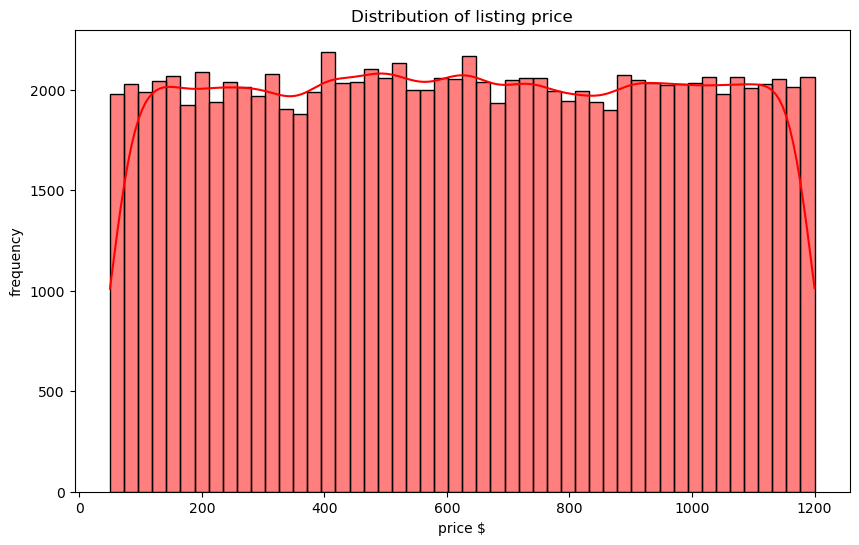

In [82]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'],bins=50,kde=True,color='red')  # kde matalab ek curve aaye hamare graph 
plt.title("Distribution of listing price")
plt.xlabel("price $")
plt.ylabel("frequency")
plt.show()

 ### Q2 How are different room types distributed ?

In [85]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license\r'],
      dtype='object')

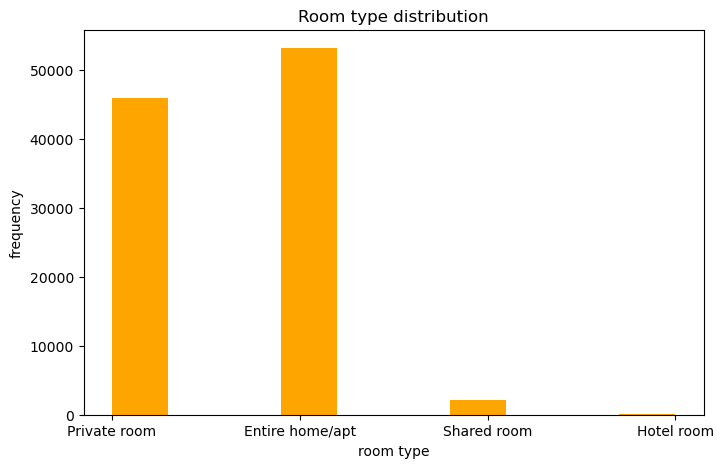

In [96]:
plt.figure(figsize=(8,5))
plt.hist(df['room type'],color='orange')
plt.title("Room type distribution")
plt.xlabel("room type")
plt.ylabel("frequency")
plt.show()

### Q3) How are listings distributed across different neighborhoods?

In [98]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license\r'],
      dtype='object')

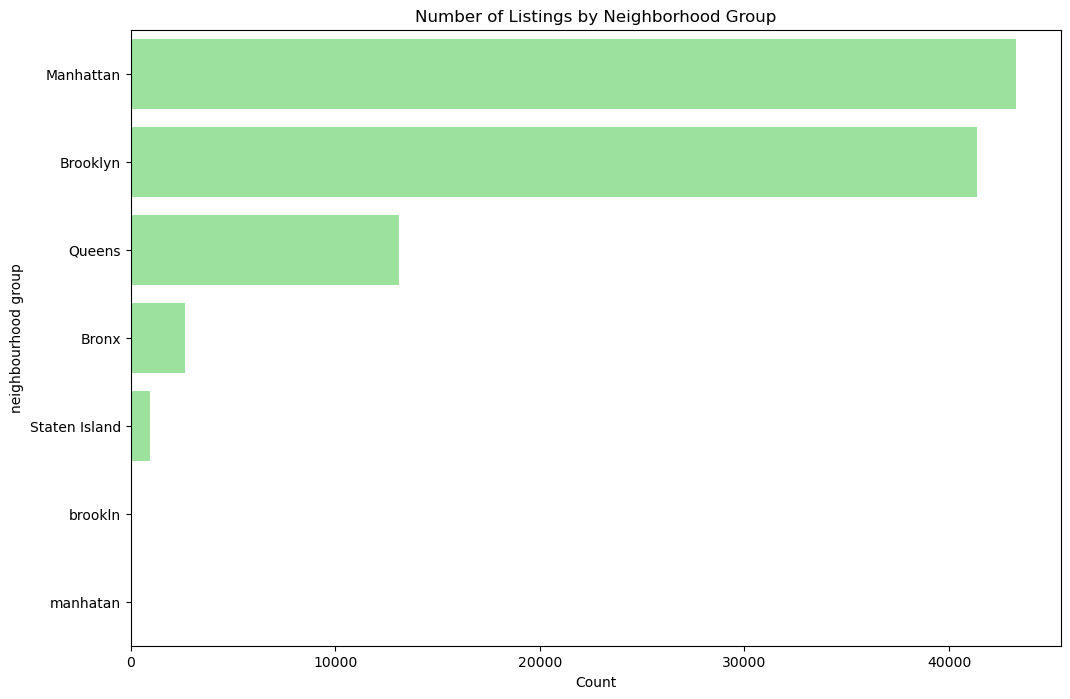

In [100]:
plt.figure(figsize=(12,8))
sns.countplot(y='neighbourhood group',data=df,color='lightgreen',order=df['neighbourhood group'].value_counts().index)
plt.title("Number of Listings by Neighborhood Group")
plt.xlabel("Count")
plt.ylabel("neighbourhood group")
plt.show()

### Q4) What are the relationship between price and room type?

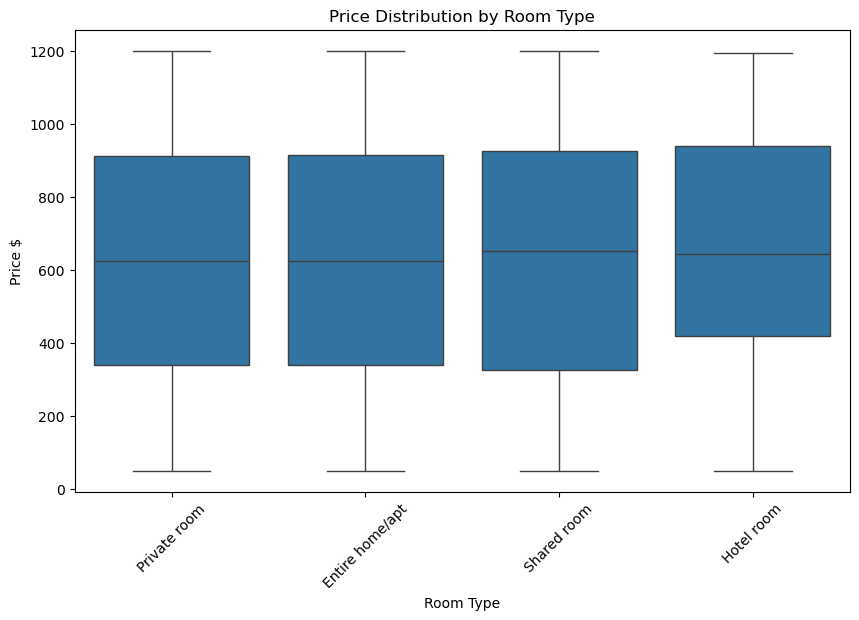

In [111]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.ylabel('Price $')
plt.xticks(rotation=45)
# plt.tight_layout()
plt.xlabel('Room Type')
plt.show()

### Q5) How has the number of review changed over time ?

In [114]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license\r'],
      dtype='object')

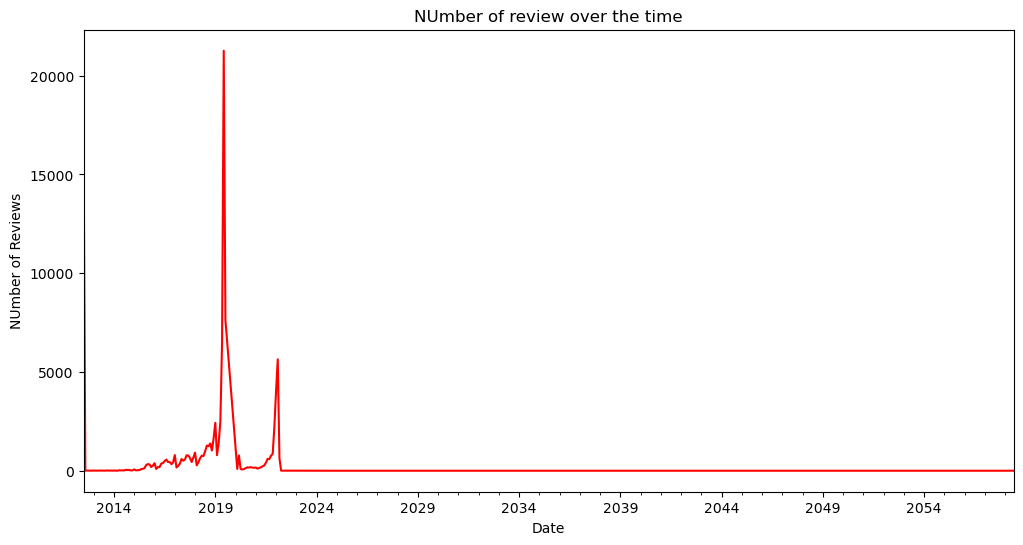

In [116]:
# reviews_over_time = df.groupby('last review')['number_of_reviews'].sum()
# plt.figure(figsize=(12, 6))
# reviews_over_time.plot()
# plt.title('Number of Reviews Over Time')
# plt.xlabel('Date')
# plt.ylabel('Number of Reviews')
# plt.tight_layout()
# plt.show()
review_over_time=df.groupby(df['last review'].dt.to_period('M')).size()
plt.figure(figsize=(12,6))
review_over_time.plot(kind='line',color='red')
plt.title("NUmber of review over the time")
plt.xlabel("Date")
plt.ylabel("NUmber of Reviews")
plt.show()

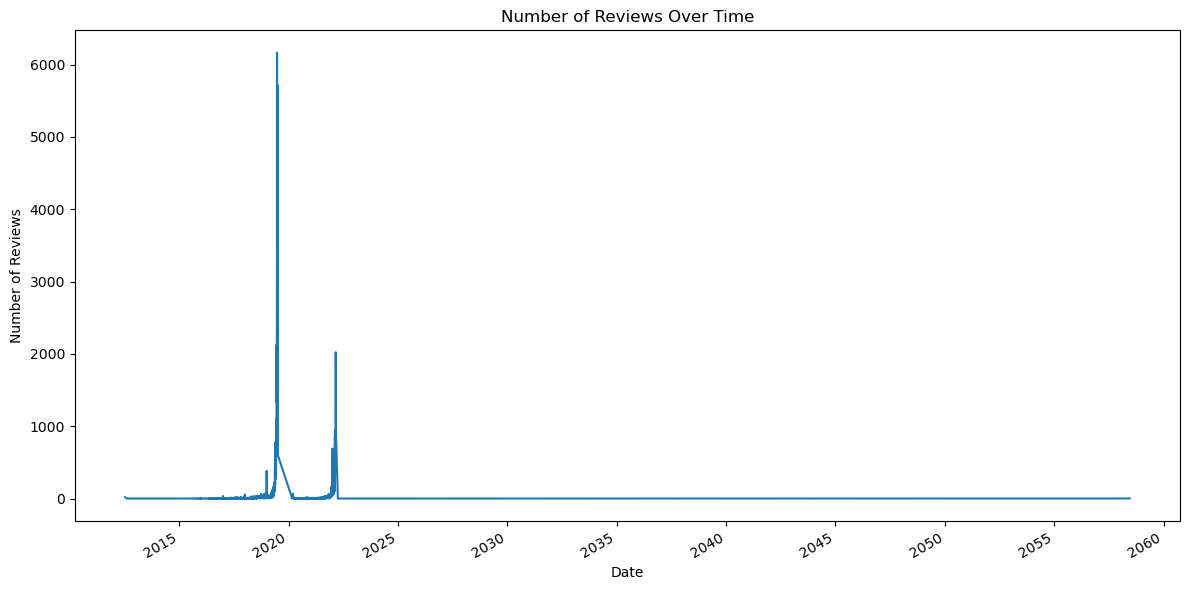

In [120]:
# both graphs are valid
reviews_over_time = df.groupby('last review')['reviews per month'].sum()
plt.figure(figsize=(12, 6))
reviews_over_time.plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()